In [37]:
import os

import numpy as np
import pandas as pd

from tqdm.auto import tqdm

In [2]:
male = pd.read_csv("male.csv")
female = pd.read_csv("female.csv")
all = pd.read_csv("all.csv", index_col=["No"])

In [3]:
print(all.shape)
print(all.head)

(647, 113)
<bound method NDFrame.head of      Unnamed: 0             タイムスタンプ ランサーズのユーザー名を入力してください あなたの性別は男性ですか？  年齢  \
No                                                                           
0             0   9/13/2022 6:30:44               akkun1            はい  53   
1             1   9/13/2022 6:31:24             o1571139            はい  36   
2             2   9/13/2022 6:35:40               a45197            はい  37   
3             3   9/13/2022 6:36:10           d87wtqejmb            はい  37   
4             4   9/13/2022 6:36:40             mikib941            はい  57   
..          ...                 ...                  ...           ...  ..   
642         316  9/13/2022 12:10:48           soon_crazy           NaN  50   
643         317  9/13/2022 12:19:27           summer-sky           NaN  35   
644         318  9/13/2022 13:42:22          hacchi-0318           NaN  36   
645         319  9/13/2022 14:31:42          user_ayoshi           NaN  56   
646         320  9/13/2

In [4]:
df_data = all.iloc[:, 6:106]

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=15)
pca.fit(df_data)

PCA(n_components=15)

In [7]:
print(f"主成分: \n{pca.components_}")
print(f"分散: \n{pca.explained_variance_}")
print(f"寄与率: \n{pca.explained_variance_ratio_}")

主成分: 
[[ 0.07464914  0.07486257  0.09261701 ...  0.07352452  0.03905475
   0.10959158]
 [-0.05656527  0.06163844  0.06228509 ... -0.07353781  0.03441256
  -0.01603213]
 [ 0.06446097 -0.09589011  0.14632292 ... -0.10949647 -0.04181671
  -0.08463785]
 ...
 [-0.23267938 -0.07285255 -0.04638072 ...  0.25167006 -0.09150573
   0.06221148]
 [ 0.01764343 -0.05736767 -0.11527703 ... -0.06133011 -0.04267088
   0.16683929]
 [ 0.18523989  0.03624941 -0.01477394 ...  0.37825445  0.03602609
  -0.09674997]]
分散: 
[210.21438003  38.39193495  26.20640409  20.11413346  15.38137349
  14.6175983   10.68823493   9.42302265   8.54973167   7.62744525
   7.21896064   6.7672525    6.66276733   6.24839739   5.7854869 ]
寄与率: 
[0.37106634 0.0677687  0.04625904 0.03550508 0.0271509  0.0258027
 0.01886666 0.01663334 0.01509182 0.01346382 0.01274277 0.01194542
 0.01176099 0.01102955 0.01021243]


In [8]:
from sklearn.decomposition import NMF

In [9]:
nmf = NMF(n_components=15, random_state=0, max_iter=1000)
nmf.fit(df_data)
nmf.components_

array([[ 5.61677869,  0.50071552,  0.        , ..., 11.32418055,
         0.        ,  3.89110575],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  5.97895663],
       [ 7.86103124,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.9771408 ],
       [ 2.30657928,  0.27354288,  0.        , ...,  0.        ,
         0.        ,  2.20073404],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  4.88500223]])

In [10]:
all['No'] = range(647)
df_target = all["No"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df_data, test_size=0.3)

In [13]:
train_scores = []
test_scores = []
n_components = list(range(5, 30))
for i in range(5, 30):
    model = NMF(n_components=i, random_state=0, max_iter=1000)
    W = model.fit_transform(train)
    H = model.components_

    train_score = np.mean((train.values-np.dot(W, H))**2)
    test_score = np.mean((test.values-np.dot(model.transform(test), H))**2)
    print(train_score, test_score)
    train_scores.append(train_score)
    test_scores.append(test_score)

2.610298048681742 2.728569958306535
2.4905541335840846 2.59128605880073
2.390192464470926 2.5082642378818254
2.30440062847164 2.4350058315060013
2.229361214792248 2.374436347560037
2.1616476456804414 2.314876871870679
2.092491608951809 2.263464230698059
2.032873985023801 2.1980752322022497
1.9736257768077836 2.1486561990812474
1.9231213525804132 2.122862071587919
1.8636272759622445 2.0412902618721502
1.8122874819752957 2.014759207711742
1.7606051552938593 1.9661022956903147
1.719454232063098 1.9182507728623914
1.6760831673241512 1.8943865595540728
1.638923386687457 1.8668980211315673
1.5996736301400414 1.817458209253014
1.5607427482832876 1.7928328838121363
1.5283216578241143 1.765688914722928
1.4892738731323547 1.732482750971547
1.4546103258405425 1.714764973515834
1.4254096623047976 1.6527999595945708
1.3885382169175813 1.6358617168359757
1.3514235900169846 1.615310050708418
1.3232687441229998 1.573925932579003


In [14]:
import matplotlib.pyplot as plt

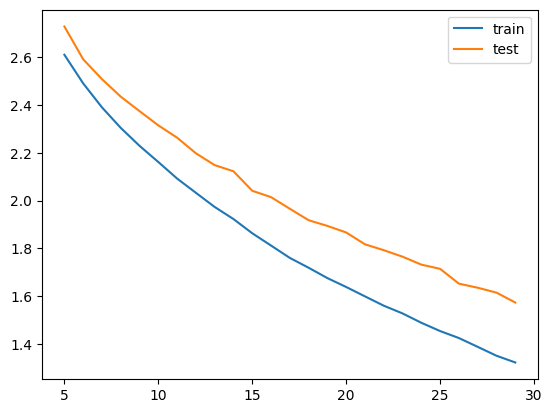

In [15]:
plt.plot(n_components, train_scores, label="train")
plt.plot(n_components, test_scores, label="test")

plt.legend()
plt.show()

In [16]:
df_t = df_data.T

In [17]:
df_t

No,0,1,2,3,4,5,6,7,8,9,...,637,638,639,640,641,642,643,644,645,646
No.1の画像があなたの好みであるかを0から10で評価してください．,8,8,3,7,6,7,0,7,5,6,...,10,5,4,5,2,0,3,3,4,3
No.2の画像があなたの好みであるかを0から10で評価してください．,3,4,3,2,8,3,2,2,6,4,...,1,2,4,2,2,0,2,2,4,0
No.3の画像があなたの好みであるかを0から10で評価してください．,6,2,1,9,5,1,2,6,6,3,...,2,0,1,1,6,0,1,1,3,3
No.4の画像があなたの好みであるかを0から10で評価してください．,7,8,2,4,6,3,2,7,4,3,...,2,0,0,0,6,2,3,1,5,0
No.5の画像があなたの好みであるかを0から10で評価してください．,8,4,7,5,5,5,6,4,5,5,...,4,3,2,4,0,0,7,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No.96の画像があなたの好みであるかを0から10で評価してください．,3,7,5,3,5,4,2,6,5,4,...,8,5,0,7,3,0,4,2,4,1
No.97の画像があなたの好みであるかを0から10で評価してください．,2,4,5,4,4,2,1,7,5,4,...,1,0,3,4,3,0,0,4,3,0
No.98の画像があなたの好みであるかを0から10で評価してください．,5,5,7,4,3,5,6,4,5,4,...,7,6,1,1,7,0,10,3,5,5
No.99の画像があなたの好みであるかを0から10で評価してください．,0,1,0,0,3,0,0,0,4,2,...,0,0,0,0,0,0,1,0,4,0


In [18]:
train_t, test_t = train_test_split(df_t, test_size=0.3)
print(train_t.shape, test_t.shape)

(70, 647) (30, 647)



2.5656240641765335 2.982355893200015
2.4177748020655296 2.9369042156545095
2.3085527396803562 2.88590696745359
2.2074041482051623 2.8696565159960707
2.1250236314100284 2.8467335507212974

2.0501820894904585 2.8047175150729164
1.9699495919622971 2.791993084828087
1.901351059261346 2.770407902516501
1.8334868610146238 2.7594279539776054
1.7732972411093058 2.7318932075899585

1.7114072039762716 2.735063274281584
1.660293584719404 2.692406336707354
1.606044524079514 2.7000993977176972
1.5523883435294523 2.700962850448081
1.5073855454394338 2.6619639253802476

1.4633170296186397 2.641698578148848
1.4187799299150399 2.655632640774906
1.3731120440591669 2.617493707631364
1.3197122557619183 2.6117323540628345
1.2750673149045122 2.608418449590594

1.242430834931034 2.623357103650776
1.2049809648946943 2.61208931944055
1.153078876334761 2.5832231569641118
1.1240347805015007 2.574242345229257
1.0854548610147463 2.574399499781165


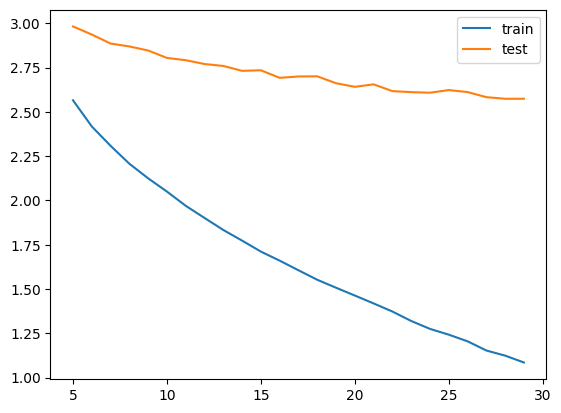

In [19]:
train_t_scores = []
test_t_scores = []
n_components = list(range(5, 30))
for i in range(5, 30):
    model = NMF(n_components=i, random_state=0, max_iter=5000)
    W = model.fit_transform(train_t)
    H = model.components_
    if i % 5 == 0:
        print()

    train_score = np.mean((train_t.values-np.dot(W, H))**2)
    test_score = np.mean((test_t.values-np.dot(model.transform(test_t), H))**2)
    print(train_score, test_score)
    train_t_scores.append(train_score)
    test_t_scores.append(test_score)

plt.plot(n_components, train_t_scores, label="train")
plt.plot(n_components, test_t_scores, label="test")

plt.legend()
plt.show()

In [38]:
scores = []
n_components = list(range(5, 30))
random_state = 0
for col_index in tqdm(range(647)):
    df_drop = df_t.drop(col_index, axis=1)
    for i in range(5, 30):
        model = NMF(n_components=i, random_state=random_state, max_iter=5000)
        W = model.fit_transform(df_t)
        H = model.components_
        directory_path = f'nmf_w/nmf_w_r{str(random_state)}/drop_{str(col_index)}'
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)
        np.save(f'{directory_path}/nmf_w_{str(i)}_r{str(random_state)}_drop{str(col_index)}', W)

        score = np.mean((df_t.values-np.dot(W, H))**2)
        scores.append(score)

print(scores)

plt.plot(n_components, scores, label="all")
plt.xlabel("n")
plt.ylabel("mean squared error")
plt.show()

  0%|          | 0/647 [00:00<?, ?it/s]